In [2152]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
path = 'Selected_Funduses/jpg/glaucoma_167_left.jpg'
width = 512
height = 512

In [2153]:
fundus = cv2.imread(path)
fundus = cv2.resize(fundus,(width,height), interpolation = cv2.INTER_CUBIC)

### Get Region of Interest

Blue Channel:
Minimum Pixel Value: 0
Maximum Pixel Value: 178
Shape:  (512, 512)

Green Channel:
Minimum Pixel Value: 0
Maximum Pixel Value: 225
Shape:  (512, 512)

Red Channel:
Minimum Pixel Value: 0
Maximum Pixel Value: 255
Shape:  (512, 512)


Text(0.5, 1.0, 'Red')

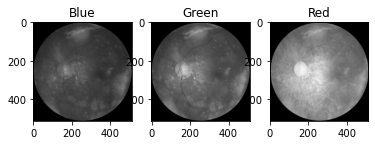

In [2154]:
# Split fundus image into channels
blue, green, red = cv2.split(fundus)

# Print channel infos
print('Blue Channel:')
print('Minimum Pixel Value: '+ str(blue.min()))
print('Maximum Pixel Value: '+ str(blue.max()))
print('Shape: ',blue.shape)

print('\nGreen Channel:')
print('Minimum Pixel Value: '+ str(green.min()))
print('Maximum Pixel Value: '+ str(green.max()))
print('Shape: ',green.shape)

print('\nRed Channel:')
print('Minimum Pixel Value: '+ str(red.min()))
print('Maximum Pixel Value: '+ str(red.max()))
print('Shape: ',red.shape)

# Show channel images
fig, axs = plt.subplots(1,3)
axs[0].imshow(blue, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Blue")
axs[1].imshow(green, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Green")
axs[2].imshow(red, cmap='gray', vmin=0, vmax=255)
axs[2].set_title("Red")

Text(0.5, 1.0, 'Gaussian Blurred')

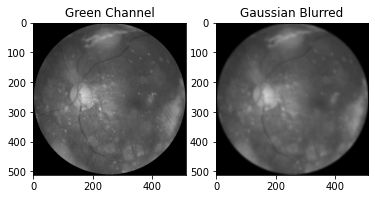

In [2155]:
# Channel selection
selected_channel = green

# Apply Gaussian blur
blurred = cv2.GaussianBlur(selected_channel,(15,15),0)

# Show blurred image
fig, axs = plt.subplots(1,2)
axs[0].imshow(selected_channel, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Green Channel")
axs[1].imshow(blurred, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Gaussian Blurred")

Text(0.5, 1.0, 'Opening')

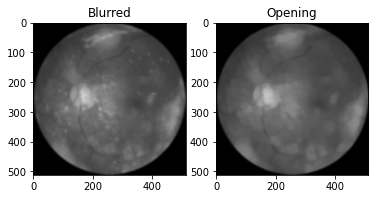

In [2156]:
# Get elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
opening = cv2.morphologyEx(blurred, cv2.MORPH_OPEN, kernel)

# Show the image that applied morphological opening and its original
fig, axs = plt.subplots(1,2)
axs[0].imshow(blurred, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Blurred")
axs[1].imshow(opening, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Opening")

Text(0.5, 1.0, 'ROI (RGB)')

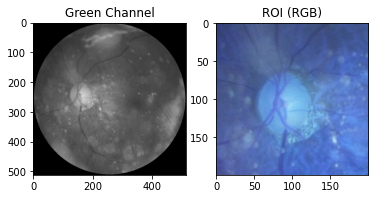

In [2157]:
# Minimum and maximum values and their indexes
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(opening)
frame_Val = 100

# Define region of interest
x0 = int(maxLoc[0]) - frame_Val
y0 = int(maxLoc[1]) - frame_Val
x1 = int(maxLoc[0]) + frame_Val
y1 = int(maxLoc[1]) + frame_Val

roi = fundus[y0:y1,x0:x1]

# Show the original image and its region of interest
fig, axs = plt.subplots(1,2)
axs[0].imshow(selected_channel, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Green Channel")
axs[1].imshow(roi, vmin=0, vmax=255)
axs[1].set_title("ROI (RGB)")

### Preprocess

Text(0.5, 1.0, 'Red')

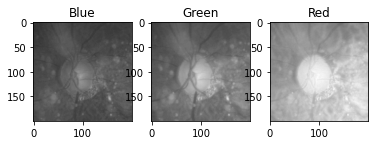

In [2158]:
blue_roi, green_roi, red_roi = cv2.split(roi)

fig, axs = plt.subplots(1, 3)
axs[0].imshow(blue_roi, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Blue")
axs[1].imshow(green_roi, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Green")
axs[2].imshow(red_roi, cmap='gray', vmin=0, vmax=255)
axs[2].set_title("Red")

Text(0.5, 1.0, 'Blurred')

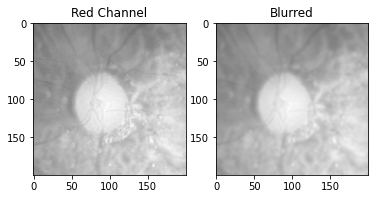

In [2159]:
# Channel selection
selected_channel = red_roi

# Apply Gaussian blur
blurred_roi = cv2.GaussianBlur(selected_channel, (5,5), 0)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(red_roi, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Red Channel")
axs[1].imshow(blurred_roi, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Blurred")

Text(0.5, 1.0, 'Added')

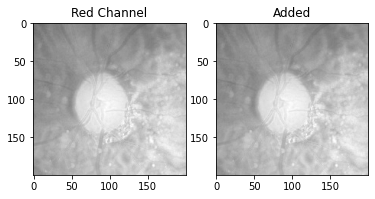

In [2160]:
added = cv2.addWeighted(red_roi, 1.5, blurred_roi, -0.5, 0, red_roi)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(red_roi, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Red Channel")
axs[1].imshow(added, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Added")

Text(0.5, 1.0, 'Closing')

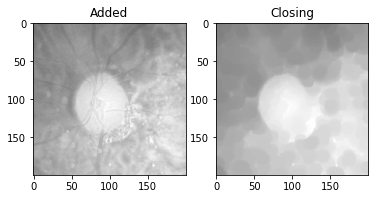

In [2161]:
# Get elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
closing = cv2.morphologyEx(added, cv2.MORPH_CLOSE, kernel)

# Show the image that applied morphological closing and its original
fig, axs = plt.subplots(1,2)
axs[0].imshow(added, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Added")
axs[1].imshow(closing, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Closing")

Text(0.5, 1.0, 'Histogram Equalized')

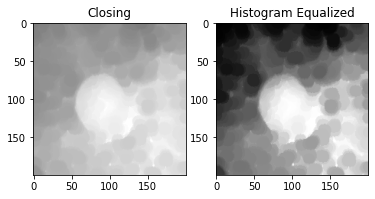

In [2162]:
hist_equalized = cv2.equalizeHist(closing)

# Show the image that applied histogram equalization and its original
fig, axs = plt.subplots(1,2)
axs[0].imshow(closing, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Closing")
axs[1].imshow(hist_equalized, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Histogram Equalized")

### Segmentation

In [2163]:
def canny(img,sigma):
	v = np.mean(img)
	sigma = sigma
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(img, lower, upper)	
	return edged,lower,upper

Preprocessed:
Minimum Pixel Value: 0
Maximum Pixel Value: 255
Shape:  (200, 200)


Text(0.5, 1.0, 'Dilated')

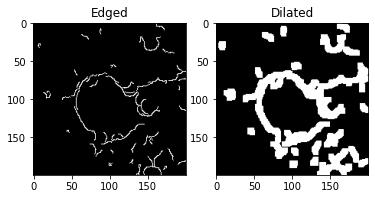

In [2164]:
# Preprocess complete
preprocessed_roi = hist_equalized

# Print infos of the preprocessing
print('Preprocessed:')
print('Minimum Pixel Value: '+ str(preprocessed_roi.min()))
print('Maximum Pixel Value: '+ str(preprocessed_roi.max()))
print('Shape: ',preprocessed_roi.shape)

# Apply Canny edge detection algorithm
# Sigma value is 0.22 that obtained empirically
[edged,lower,upper] = canny(preprocessed_roi,0.3)

kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(edged,kernel,iterations=3)

# Show detected edges and its dilation
fig, axs = plt.subplots(1,2)
axs[0].imshow(edged, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Edged")
axs[1].imshow(dilated, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Dilated")

### OPENCV

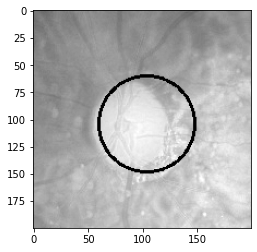

In [2165]:
# Use the Hough transform to detect circles in the image
circles = cv2.HoughCircles(dilated, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

# If circles are detected, draw them on the original image
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(selected_channel, (x, y), r, (0, 255, 0), 2)
        
# Display the result
plt.figure()
plt.imshow(selected_channel, cmap='gray', vmin=0, vmax=255)